In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt
tur = pd.read_csv('turist.csv')

In [367]:
DB = cnt.connect(
    host='localhost',
    port = 3317,
    user = 'root',
    password = 'Weau9ini.77'
)

c = DB.cursor()
c.execute('use turist')

Data from:
https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/861a3c31234c483f98b4ee2a5f9c93ad_0/about

Question 1:
How did tourists visiting Lithuania for the first time rate the visit?
How did tourists who are not visiting Lithuania for the first time rate the visit?

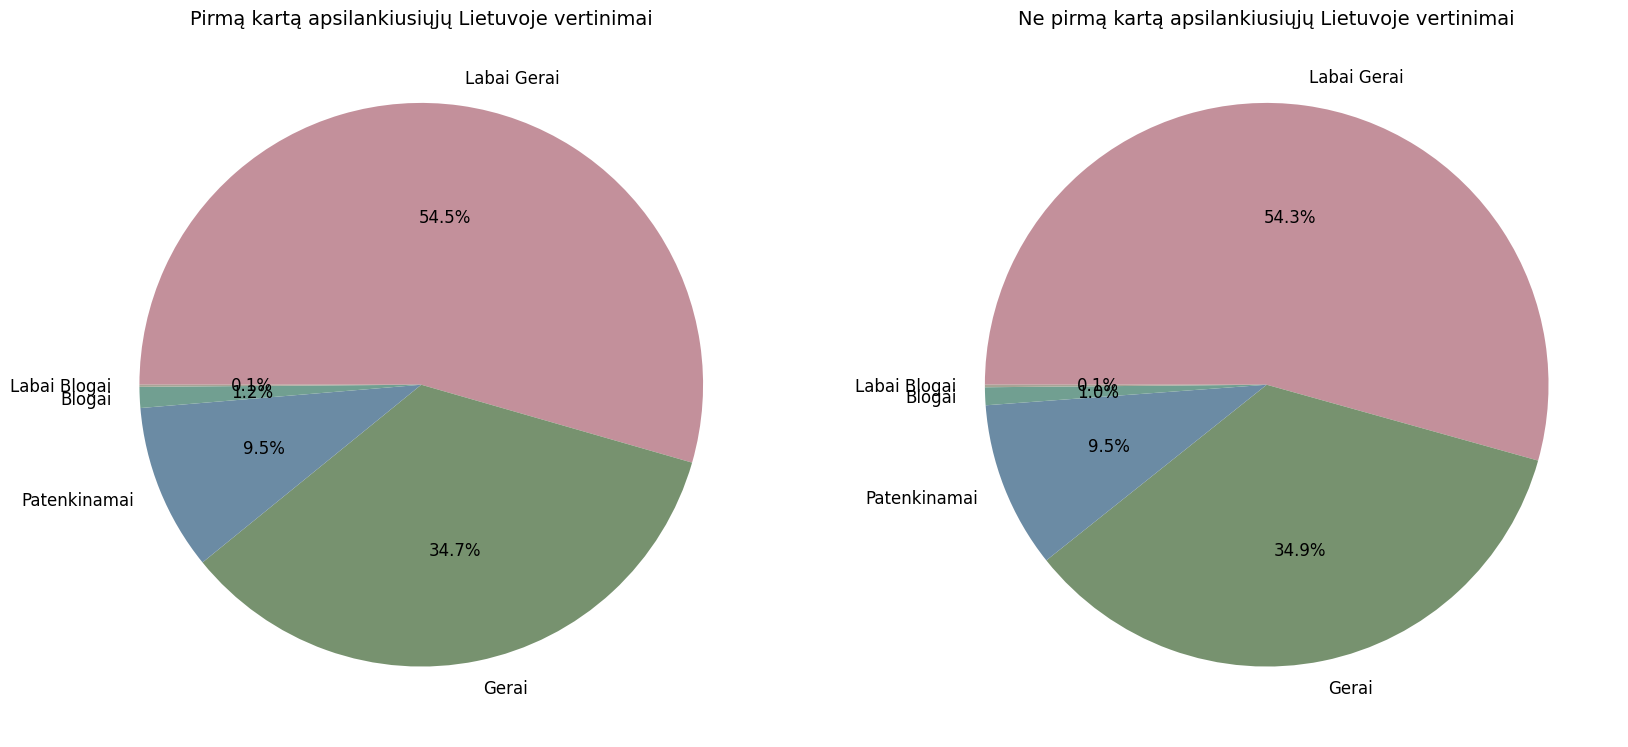

In [368]:
sql = """select distinct n210 as vert_indeksai, count(n210) as vert_skaicius
 from t
 where n2312 = 1
 group by vert_indeksai
 order by vert_indeksai asc
"""
c.execute(sql)
ats = c.fetchall()
lgerai = ats [0][1]
gerai = ats [1][1]
patenk = ats [2][1]
blogai = ats [3][1]
lblogai = ats[4][1]

sql1 = """select distinct n210 as vert_indeksai, count(n210) as vert_skaicius
 from t
 where n2312 = 2
 group by vert_indeksai
 order by vert_indeksai asc
"""
c.execute(sql1)
ats2 = c.fetchall()
lgerai1 = ats2 [0][1]
gerai1 = ats2 [1][1]
patenk1 = ats2 [2][1]
blogai1 = ats2 [3][1]
lblogai1 = ats2[4][1]

x = [lgerai, gerai, patenk, blogai, lblogai]
x1 = [lgerai1, gerai1, patenk1, blogai1, lblogai1]
label = ['Labai Gerai', 'Gerai', 'Patenkinamai', 'Blogai', 'Labai Blogai']
color = ['xkcd:grey pink', 'xkcd:green grey', 'xkcd:grey blue', 'xkcd:greyish teal', 'xkcd:greyish']

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,20))
ax1.pie(x, labels = label, autopct = '%.1f%%', startangle = 180, counterclock = False, textprops={'fontsize': 12}, colors = color) # viso 4172 vertinimų
ax2.pie(x1, labels = label, autopct = '%.1f%%', startangle = 180, counterclock = False, textprops={'fontsize': 12}, colors = color) # viso 10484 vertinimų

ax1.set_title("Pirmą kartą apsilankiusiųjų Lietuvoje vertinimai", fontsize = 14)
ax2.set_title("Ne pirmą kartą apsilankiusiųjų Lietuvoje vertinimai", fontsize = 14)

plt.show()

Answer:
We can see that the first-time and non-first-time tourists' evaluations of Lithuania are very positive. Only about 10% of people had a negative experience.
I noticed that although the number of people who are not visiting for the first time is twice as big, the impressions on Lithuania remain very similar.

Question 2:
Which city has been visited the most?
How much and on what was spent in that city per visit per person?

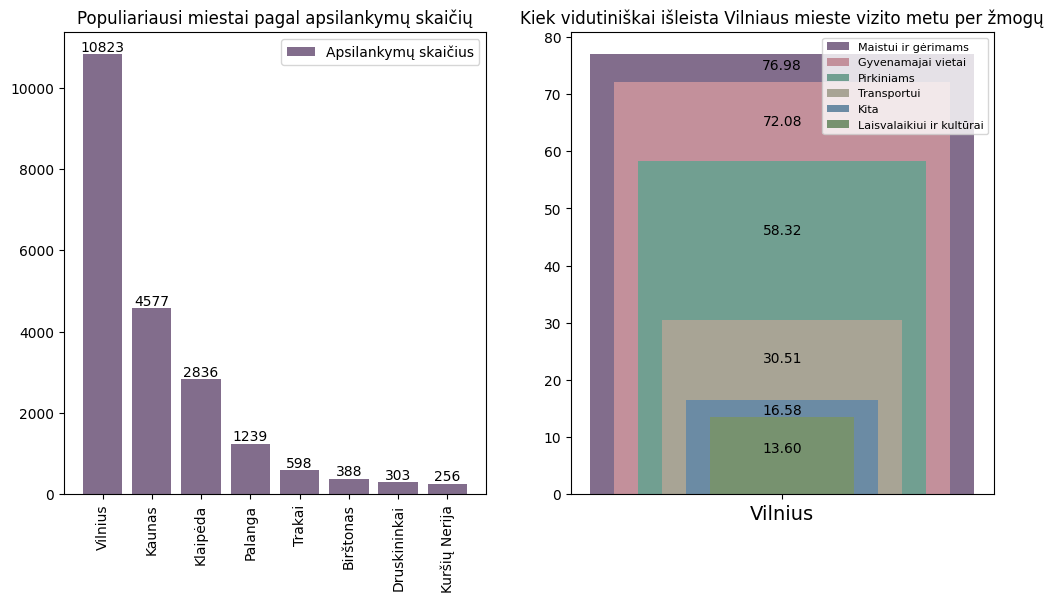

In [369]:
#issirinkau kiek kartu aplankytas kiekvienas miestas
tur = pd.read_csv('turist.csv')

V = tur['n251'].value_counts().sort_index(ascending=False).iloc[0]
Kn = tur['n252'].value_counts().sort_index(ascending=False).iloc[0]
Klp = tur['n253'].value_counts().sort_index(ascending=False).iloc[0]
P = tur['n254'].value_counts().sort_index(ascending=False).iloc[0]
T = tur['n255'].value_counts().sort_index(ascending=False).iloc[0]
B = tur['n256'].value_counts().sort_index(ascending=False).iloc[0]
D = tur['n257'].value_counts().sort_index(ascending=False).iloc[0]
KN = tur['n258'].value_counts().sort_index(ascending=False).iloc[0]

miestai = ['Vilnius', 'Kaunas', 'Klaipėda', 'Palanga', 'Trakai', 'Birštonas', 'Druskininkai', 'Kuršių Nerija']
x = np.arange(0, len(miestai))
y = [V, Kn, Klp, P, T, B, D, KN]

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))
A = ax1.bar(x,y, color = 'xkcd:grey purple', label = 'Apsilankymų skaičius')
ax1.set_xticks(x)
ax1.set_xticklabels(miestai, rotation = 90)

ax1.legend()
ax1.bar_label(A, fmt = "%.0f")
ax1.set_title("Populiariausi miestai pagal apsilankymų skaičių")

#antras grafikas

apgyv = tur['s291'].mean().round(2)
maist_ger = tur['s292'].mean().round(2)
transp = tur['s293'].mean().round(2)
laisv_kult = tur['s294'].mean().round(2)
pirkiniai = tur['s295'].mean().round(2)
kita = tur['s296'].mean().round(2)

miestas = ['Vilnius']
x1 = np.arange(0, len(miestas))

A = ax2.bar (x1, maist_ger, width=1.6, label = 'Maistui ir gėrimams', color = 'xkcd:grey purple')
B = ax2.bar (x1, apgyv, width = 1.4, label = 'Gyvenamajai vietai', color = 'xkcd:grey pink')
C = ax2.bar (x1, pirkiniai, width = 1.2, label = 'Pirkiniams', color = 'xkcd:greyish teal')
D = ax2.bar (x1, transp, width = 1, label = 'Transportui', color = 'xkcd:greyish')
E = ax2.bar (x1, kita, width = 0.8, label = 'Kita', color = 'xkcd:grey blue')
F = ax2.bar (x1, laisv_kult, width = 0.6, label = 'Laisvalaikiui ir kultūrai', color = 'xkcd:green grey')


ax2.set_xticks(x1)
ax2.set_xticklabels(miestas, fontsize = 14)
ax2.set_title("Kiek vidutiniškai išleista Vilniaus mieste vizito metu per žmogų")

ax2.bar_label(A, fmt = "%.2f", label_type = "center", padding = 150)
ax2.bar_label(B, fmt = "%.2f", label_type = "center", padding = 120)
ax2.bar_label(C, fmt = "%.2f", label_type = "center", padding = 70)
ax2.bar_label(D, fmt = "%.2f", label_type = "center", padding = 35)
ax2.bar_label(E, fmt = "%.2f", label_type = "center", padding = 26)
ax2.bar_label(F, fmt = "%.2f", label_type = "center", padding = 5)

ax2.legend(fontsize = 8)


plt.show()

Answer:
We can clearly see that Vilnius was visited the most times. Then we can see what the tourists' expenses were in Vilnius.
We see that most of the money is spent on the fundamental basic needs of people, i.e. food and shelter.
However, the least amount spent was on leisure and culture. The idea that people explored the Lithuania's nature seems apparent to me, because a good proportion of money was allocated for transportation.
Aside the basic needs, highest expenses were for shopping, which suggests it is also a form of leisure.